In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
model_df = pd.read_csv('trained_house_data.csv')


In [3]:
model_df.shape

(20357, 43)

In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20357 non-null  object 
 1   type             20357 non-null  float64
 2   locality         20357 non-null  object 
 3   activation_date  20357 non-null  object 
 4   latitude         20357 non-null  float64
 5   longitude        20357 non-null  float64
 6   lease_type       20357 non-null  float64
 7   gym              20357 non-null  int64  
 8   lift             20357 non-null  int64  
 9   swimming_pool    20357 non-null  int64  
 10  negotiable       20357 non-null  int64  
 11  furnishing       20357 non-null  float64
 12  parking          20357 non-null  float64
 13  property_size    20357 non-null  int64  
 14  property_age     20357 non-null  float64
 15  bathroom         20357 non-null  float64
 16  facing           20357 non-null  int64  
 17  cup_board   

In [5]:
model_df.duplicated().sum()

0

In [6]:
model_df.describe().T

,count,mean,std,min,25%,50%,75%,max
type,20357.0,0.401220,0.196122,0.000196,0.213882,0.568993,0.568993,0.568993
latitude,20357.0,12.945749,0.029582,12.900004,12.918242,12.943792,12.970914,12.999999
longitude,20357.0,77.637238,0.110805,77.500072,77.571891,77.633367,77.695707,80.266346
lease_type,20357.0,0.470077,0.080945,0.002849,0.472270,0.472270,0.496193,0.496193
gym,20357.0,0.226359,0.418485,0.000000,0.000000,0.000000,0.000000,1.000000
lift,20357.0,0.361006,0.480304,0.000000,0.000000,0.000000,1.000000,1.000000
swimming_pool,20357.0,0.174633,0.379662,0.000000,0.000000,0.000000,0.000000,1.000000
negotiable,20357.0,0.711401,0.453122,0.000000,0.000000,1.000000,1.000000,1.000000
furnishing,20357.0,0.987326,0.356475,0.000000,1.000000,1.000000,1.000000,2.000000
parking,20357.0,1.275974,1.002933,0.000000,0.000000,2.000000,2.000000,3.000000


In [14]:
from geopy.distance import geodesic

city_center_coords = (12.929557,77.672280)
model_df['distance_to_city_center'] = model_df.apply(lambda row:
                                                          geodesic((row['latitude'], row['longitude']), city_center_coords).meters,
                                                          axis=1)

model_df['activation_month'] = pd.to_datetime(model_df['activation_date']).dt.month
model_df['activation_year'] = pd.to_datetime(model_df['activation_date']).dt.year


In [15]:
model_df[['distance_to_city_center','activation_month','activation_year']]

,distance_to_city_center,activation_month,activation_year
0,0.045707,9,2017
1,281056.309346,12,2018
2,15539.119966,7,2018
3,4536.173730,5,2018
4,8013.162875,10,2017
...,...,...,...
20352,8303.324962,11,2017
20353,4335.029339,10,2017
20354,11872.827328,12,2017
20355,4788.558692,6,2018


In [17]:
model_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,GP,PARK,RWH,STP,HK,PB,VP,distance_to_city_center,activation_month,activation_year
0,ff8081815ee25e15015ee50004da2acd,0.568993,Bellandur,2017-09-10,12.929557,77.672280,0.472270,0,1,0,...,0,1,1,1,0,1,1,0.045707,9,2017
1,ff80818163f29c9e0163f46770b873e7,0.213882,Thiruvanmiyur,2018-12-06,12.982870,80.262012,0.496193,0,1,0,...,0,1,0,0,0,1,1,281056.309346,12,2018
2,ff80818164b68a700164b74b1b247a1d,0.175664,Attiguppe,2018-07-20,12.955991,77.531634,0.496193,0,0,0,...,0,0,0,0,0,0,0,15539.119966,7,2018
3,ff80818163b1faf00163b4b9b8a163b1,0.213882,Kodihalli,2018-05-31,12.963903,77.649446,0.496193,0,0,0,...,0,1,0,0,0,0,1,4536.173730,5,2018
4,ff8081815f48e4aa015f4dd1a9c6696b,0.175664,"Seetharampalya,Hoodi",2017-10-24,12.986196,77.718314,0.496193,1,1,1,...,0,0,0,0,0,1,0,8013.162875,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,ff80818159ded60e0159dfff948e5bcb,0.175664,Ulsoor,2017-11-10,12.979762,77.615395,0.472270,0,1,0,...,1,1,0,0,1,0,1,8303.324962,11,2017
20353,ff8081815e73c2e2015e74ac10e91975,0.568993,Koramangala 4th Block,2017-10-19,12.931072,77.632361,0.472270,0,0,0,...,0,1,1,0,0,0,0,4335.029339,10,2017
20354,ff8081816073f28c016077bb8db47e4f,0.568993,Kumaraswamy Layout,2017-12-21,12.901800,77.566597,0.496193,1,1,0,...,0,1,0,0,0,1,0,11872.827328,12,2017
20355,ff8081814c6f8c9b014c6febae49016f,0.568993,Indiranagar,2018-06-28,12.965502,77.647694,0.496193,0,1,0,...,0,1,0,0,1,1,1,4788.558692,6,2018


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
model_df1 = model_df.drop(['id','locality','activation_date'], axis=1)

In [25]:
model_df1

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,GP,PARK,RWH,STP,HK,PB,VP,distance_to_city_center,activation_month,activation_year
0,0.568993,12.929557,77.672280,0.472270,0,1,0,1,1.0,2.0,...,0,1,1,1,0,1,1,0.045707,9,2017
1,0.213882,12.982870,80.262012,0.496193,0,1,0,0,1.0,2.0,...,0,1,0,0,0,1,1,281056.309346,12,2018
2,0.175664,12.955991,77.531634,0.496193,0,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,15539.119966,7,2018
3,0.213882,12.963903,77.649446,0.496193,0,0,0,1,1.0,2.0,...,0,1,0,0,0,0,1,4536.173730,5,2018
4,0.175664,12.986196,77.718314,0.496193,1,1,1,1,1.0,2.0,...,0,0,0,0,0,1,0,8013.162875,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,0.175664,12.979762,77.615395,0.472270,0,1,0,1,1.0,0.0,...,1,1,0,0,1,0,1,8303.324962,11,2017
20353,0.568993,12.931072,77.632361,0.472270,0,0,0,1,1.0,2.0,...,0,1,1,0,0,0,0,4335.029339,10,2017
20354,0.568993,12.901800,77.566597,0.496193,1,1,0,1,1.0,2.0,...,0,1,0,0,0,1,0,11872.827328,12,2017
20355,0.568993,12.965502,77.647694,0.496193,0,1,0,0,1.0,2.0,...,0,1,0,0,1,1,1,4788.558692,6,2018


In [34]:
columns_except_target = [col for col in model_df1.columns if col != 'rent']

rent = columns_except_target + ['rent']
model_df1 = model_df1[rent]

In [38]:
model_df1

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,PARK,RWH,STP,HK,PB,VP,distance_to_city_center,activation_month,activation_year,rent
0,0.568993,12.929557,77.672280,0.472270,0,1,0,1,1.0,2.0,...,1,1,1,0,1,1,0.045707,9,2017,22000.0
1,0.213882,12.982870,80.262012,0.496193,0,1,0,0,1.0,2.0,...,1,0,0,0,1,1,281056.309346,12,2018,28000.0
2,0.175664,12.955991,77.531634,0.496193,0,0,0,1,1.0,0.0,...,0,0,0,0,0,0,15539.119966,7,2018,8000.0
3,0.213882,12.963903,77.649446,0.496193,0,0,0,1,1.0,2.0,...,1,0,0,0,0,1,4536.173730,5,2018,45000.0
4,0.175664,12.986196,77.718314,0.496193,1,1,1,1,1.0,2.0,...,0,0,0,0,1,0,8013.162875,10,2017,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,0.175664,12.979762,77.615395,0.472270,0,1,0,1,1.0,0.0,...,1,0,0,1,0,1,8303.324962,11,2017,20000.0
20353,0.568993,12.931072,77.632361,0.472270,0,0,0,1,1.0,2.0,...,1,1,0,0,0,0,4335.029339,10,2017,30000.0
20354,0.568993,12.901800,77.566597,0.496193,1,1,0,1,1.0,2.0,...,1,0,0,0,1,0,11872.827328,12,2017,16000.0
20355,0.568993,12.965502,77.647694,0.496193,0,1,0,0,1.0,2.0,...,1,0,0,1,1,1,4788.558692,6,2018,30000.0


### Feature Selection

In [39]:
X = model_df1.iloc[:,0:42]  
y = model_df1.iloc[:,-1]    

In [40]:
X

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,GP,PARK,RWH,STP,HK,PB,VP,distance_to_city_center,activation_month,activation_year
0,0.568993,12.929557,77.672280,0.472270,0,1,0,1,1.0,2.0,...,0,1,1,1,0,1,1,0.045707,9,2017
1,0.213882,12.982870,80.262012,0.496193,0,1,0,0,1.0,2.0,...,0,1,0,0,0,1,1,281056.309346,12,2018
2,0.175664,12.955991,77.531634,0.496193,0,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,15539.119966,7,2018
3,0.213882,12.963903,77.649446,0.496193,0,0,0,1,1.0,2.0,...,0,1,0,0,0,0,1,4536.173730,5,2018
4,0.175664,12.986196,77.718314,0.496193,1,1,1,1,1.0,2.0,...,0,0,0,0,0,1,0,8013.162875,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,0.175664,12.979762,77.615395,0.472270,0,1,0,1,1.0,0.0,...,1,1,0,0,1,0,1,8303.324962,11,2017
20353,0.568993,12.931072,77.632361,0.472270,0,0,0,1,1.0,2.0,...,0,1,1,0,0,0,0,4335.029339,10,2017
20354,0.568993,12.901800,77.566597,0.496193,1,1,0,1,1.0,2.0,...,0,1,0,0,0,1,0,11872.827328,12,2017
20355,0.568993,12.965502,77.647694,0.496193,0,1,0,0,1.0,2.0,...,0,1,0,0,1,1,1,4788.558692,6,2018


In [43]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(X, y)

selected_features = fit.transform(X)

selected_indices = fit.get_support(indices=True)

print(selected_indices)


[ 0  5  9 10 12 14 18 19 20 37]


In [66]:
indices_to_print = [0, 5, 9, 10, 12, 14, 18, 19, 20, 37,42]

selected_rows = model_df1.iloc[:,indices_to_print]

selected_rows


,type,lift,parking,property_size,bathroom,cup_board,building_type,balconies,LIFT,PB,rent
0,0.568993,1,2.0,1400,2.0,2.0,0,2.0,1,1,22000.0
1,0.213882,1,2.0,1350,3.0,3.0,0,3.0,1,1,28000.0
2,0.175664,0,0.0,600,1.0,1.0,3,0.0,0,0,8000.0
3,0.213882,0,2.0,1500,3.0,4.0,3,1.0,0,0,45000.0
4,0.175664,1,2.0,1080,2.0,1.0,0,2.0,1,1,18000.0
...,...,...,...,...,...,...,...,...,...,...,...
20352,0.175664,1,0.0,850,2.0,1.0,0,1.0,1,0,20000.0
20353,0.568993,0,2.0,1000,2.0,2.0,3,2.0,0,0,30000.0
20354,0.568993,1,2.0,1000,2.0,2.0,0,2.0,1,1,16000.0
20355,0.568993,1,2.0,1000,2.0,2.0,0,3.0,1,1,30000.0


In [67]:
final_df = model_df1.iloc[:,indices_to_print]

In [51]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [52]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [53]:
featureScores

,Specs,Score
0,type,0.344964
1,latitude,0.072947
2,longitude,0.161814
3,lease_type,0.035962
4,gym,0.124468
5,lift,0.168169
6,swimming_pool,0.106069
7,negotiable,0.017823
8,furnishing,0.080328
9,parking,0.188106


In [54]:
print(featureScores.nlargest(10,'Score')) 

            Specs     Score
10  property_size  0.519622
12       bathroom  0.367482
0            type  0.344964
14      cup_board  0.231016
9         parking  0.188106
20           LIFT  0.185716
18  building_type  0.179434
19      balconies  0.174378
5            lift  0.168169
37             PB  0.167690


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [56]:
print(model.feature_importances_)

[0.01988224 0.06186244 0.06407998 0.03187165 0.00431871 0.00379235
 0.00232764 0.01811423 0.01291019 0.02130552 0.06258166 0.0552081
 0.02078714 0.04333823 0.03664122 0.04550015 0.04631974 0.03215445
 0.01704684 0.03554924 0.00422023 0.00490107 0.02444621 0.00487395
 0.00658643 0.00781527 0.0028533  0.0155294  0.00885498 0.00532672
 0.01064072 0.02442198 0.01088472 0.02301287 0.01619253 0.01318764
 0.01198393 0.00842974 0.01583807 0.06461389 0.05520001 0.02459461]


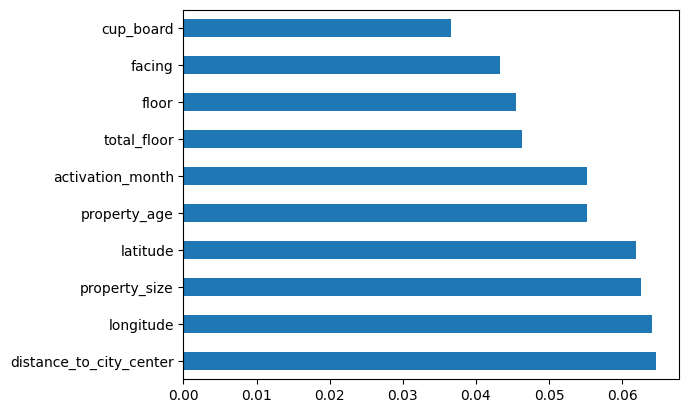

In [57]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [68]:
final_df

,type,lift,parking,property_size,bathroom,cup_board,building_type,balconies,LIFT,PB,rent
0,0.568993,1,2.0,1400,2.0,2.0,0,2.0,1,1,22000.0
1,0.213882,1,2.0,1350,3.0,3.0,0,3.0,1,1,28000.0
2,0.175664,0,0.0,600,1.0,1.0,3,0.0,0,0,8000.0
3,0.213882,0,2.0,1500,3.0,4.0,3,1.0,0,0,45000.0
4,0.175664,1,2.0,1080,2.0,1.0,0,2.0,1,1,18000.0
...,...,...,...,...,...,...,...,...,...,...,...
20352,0.175664,1,0.0,850,2.0,1.0,0,1.0,1,0,20000.0
20353,0.568993,0,2.0,1000,2.0,2.0,3,2.0,0,0,30000.0
20354,0.568993,1,2.0,1000,2.0,2.0,0,2.0,1,1,16000.0
20355,0.568993,1,2.0,1000,2.0,2.0,0,3.0,1,1,30000.0


In [69]:
final_df.to_csv('final_df.csv', index=False)

In [5]:
final_df = pd.read_csv('final_df.csv')

In [6]:
final_df.shape

(20357, 11)

In [7]:
X = final_df.drop('rent',axis=1)
y = final_df['rent']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [24]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [25]:
# Save the scaler
import pickle
pickle.dump(sc_X, open('scaler.pkl', 'wb'))
pickle.dump(sc_y, open('scaler_y.pkl', 'wb'))


In [77]:
print(X_train,y_train)

[[-0.95599955  1.33143473  0.71922974 ...  0.85438505  1.24992357
   1.31756712]
 [ 0.85268707  1.33143473  0.71922974 ...  1.85802335  1.24992357
  -0.75897462]
 [-1.15065417 -0.75106949 -1.26957378 ... -0.14925325 -0.80004892
  -0.75897462]
 ...
 [-0.95599955 -0.75106949 -1.26957378 ...  0.85438505  1.24992357
   1.31756712]
 [-1.15065417 -0.75106949 -1.26957378 ... -0.14925325 -0.80004892
  -0.75897462]
 [ 0.85268707 -0.75106949  0.71922974 ... -0.14925325 -0.80004892
  -0.75897462]] [[ 1.06344855]
 [-0.30347065]
 [-1.07607716]
 ...
 [ 2.01434886]
 [-0.71948954]
 [-0.48176446]]


In [78]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)
r2_score_lm = metrics.r2_score(y_test, lm_prediction)

In [79]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)
print('R2 Score:', r2_score_lm)

MAE: 0.47961644912789825
MSE: 0.5264915143087484
RMSE: 0.7255973499874075
R2 Score: 0.4735084856912516


In [82]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)
r2_score_dt = metrics.r2_score(y_test, dt_prediction)

In [83]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)
print('R2 Score:', r2_score_dt)

MAE: 0.635531614992369
MSE: 0.7667832993114795
RMSE: 0.8756616351716452
R2 Score: 0.23321670068852052


In [84]:
svr = SVR()
svr.fit(X_train, y_train) 
svr_prediction = svr.predict(X_test)

mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
mse_svr =  metrics.mean_squared_error(y_test, svr_prediction)
rmse_svr =  np.sqrt(mse_svr)
r2_score_svr = metrics.r2_score(y_test, svr_prediction)

In [85]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)
print('R2 Score:', r2_score_svr)

MAE: 0.45544581053410915
MSE: 0.41222599316495934
RMSE: 0.642048279465773
R2 Score: 0.5877740068350407


In [86]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)
r2_score_rf = metrics.r2_score(y_test, rf_prediction)

In [87]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)
print('R2 Score:', r2_score_rf)

MAE: 0.4964691683422755
MSE: 0.44574059507730196
RMSE: 0.6676380719201849
R2 Score: 0.5542594049226981


In [88]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

mae_clf = metrics.mean_absolute_error(y_test, clf_prediction)
mse_clf =  metrics.mean_squared_error(y_test, clf_prediction)
rmse_clf =  np.sqrt(mse_clf)
r2_score_clf = metrics.r2_score(y_test, clf_prediction)

In [89]:
print('MAE:', mae_clf)
print('MSE:', mse_clf)
print('RMSE:', rmse_clf)
print('R2 Score:', r2_score_clf)

MAE: 0.5108515846472224
MSE: 0.5670423837174399
RMSE: 0.7530221668167809
R2 Score: 0.43295761628256013


In [94]:
unique_localities_count = len(model_df['locality'].unique())
print("Number of unique localities:", unique_localities_count)


Number of unique localities: 1917


In [7]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

param_distributions = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

rf_regressor = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(rf_regressor, param_distributions, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

y_pred = best_rf_model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Best Hyperparameters:', best_params)
print('R-squared:', r_squared)
print('Mean Squared Error:', mse)

Best Hyperparameters: {'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_depth': 60}
R-squared: 0.6384117018264565
Mean Squared Error: 26004845.910870545


In [9]:
from sklearn.model_selection import GridSearchCV 
dtr = DecisionTreeRegressor()

param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 1, 2, 3]
}
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean squared error: 27094150.523136992
R-squared: 0.6232653017173382


In [2]:
from tpot import TPOTRegressor

c:\Users\VENKA\Desktop\Data Science\Project\.venv\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [9]:
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=2, random_state=42)
tpot.fit(X_train, y_train)

                                                                           
Generation 1 - Current best internal CV score: -24231188.036451943
                                                                           
Generation 2 - Current best internal CV score: -24231188.036451943
                                                                           
Generation 3 - Current best internal CV score: -24014122.94994953
                                                                            
Generation 4 - Current best internal CV score: -24014122.94994953
                                                                            
Generation 5 - Current best internal CV score: -24014122.94994953
                                                                            
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=5, population_size=2, random_state=42, verbosity=2)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Define the RandomForestRegressor with specified parameters
model = RandomForestRegressor(
    bootstrap=True,
    max_features=0.4,
    min_samples_leaf=16,
    min_samples_split=14,
    n_estimators=100
)

# Fit the model on your training data
model.fit(X_train, y_train)

# Predict on the training set using cross-validation
y_pred_train = cross_val_predict(model, X_train, y_train, cv=5)

# Evaluate the model on training data
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error on Training Data: {mse}")
print(f"R-squared Score on Training Data: {r2}")


Mean Squared Error on Training Data: 24014143.586321015
R-squared Score on Training Data: 0.6607208969046043


In [35]:
y_pred_test = model.predict(X_test)



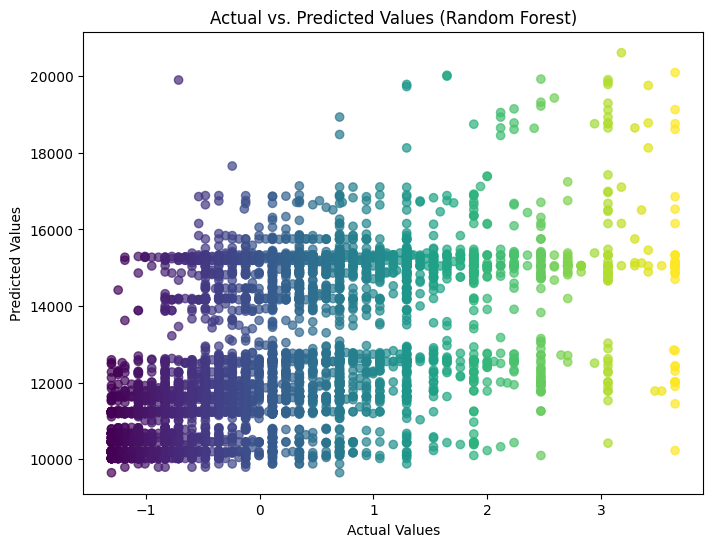

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, c=y_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()

In [20]:
import pickle 
import joblib

# Save the trained model
joblib.dump(model, 'trained_house_data.pkl')


['trained_house_data.pkl']

In [21]:
# Load the trained model
loaded_model = joblib.load('trained_house_data.pkl')


In [32]:
loaded_model_x = joblib.load('scaler.pkl')
loaded_model_y = joblib.load('scaler_y.pkl')

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

new_data = [[0.568993, 1, 2.0, 1400, 2.0, 2.0,0,2.0,1,1]]  

columns = ['type', 'lift', 'parking', 'property_size', 'bathroom', 'cup_board', 'building_type', 'balconies', 'LIFT', 'PB']
new_df = pd.DataFrame(new_data, columns=columns)
prediction = loaded_model.predict(new_df)

print("Predicted value:", prediction[0])

Predicted value: 25178.902781742243


In [62]:
test_df = pd.read_excel('House_Rent_Test.xlsx')

In [63]:
test_df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [64]:
test_df.duplicated().sum()

0

In [65]:
test_df.shape

(4500, 24)

In [66]:
test_df['amenities']

0       {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
1       {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
2       {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
3       {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
4       {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
                              ...                        
4495    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
4496    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
4497    {"SC":false,"INTERCOM":false,"AC":false,"PB":f...
4498    {"SC":false,"INTERCOM":true,"AC":false,"PB":tr...
4499    {"LIFT":true,"GYM":true,"INTERNET":false,"AC":...
Name: amenities, Length: 4500, dtype: object

In [67]:
import json

def extract_amenities(row):
    amenities_dict = json.loads(row)
    return pd.Series(amenities_dict)

df_amenities = test_df['amenities'].apply(extract_amenities)

In [68]:
df_amenities

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,True,True,False,True,True,True,True,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4496,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4497,False,False,False,False,NaN,False,False,NaN,False,NaN,True,False,NaN,False,NaN,NaN,False,False,NaN
4498,True,True,True,False,NaN,True,True,NaN,True,NaN,True,False,NaN,True,NaN,NaN,False,True,NaN


In [69]:
df_teste = pd.concat([test_df['id'], df_amenities], axis=1)
df_teste

,id,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815df539bc015df947ce976cca,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,ff80818157288e9301572c05651853a6,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
2,ff8081815f1afc58015f1b831fde166e,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False
3,ff8081816035b31901603f7922c046e0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,ff8081815c3582f5015c38fc31aa73a4,True,True,True,False,True,True,True,True,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4496,ff8081816098166901609bf52bb702a8,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4497,ff808181629ac9860162a7ac1a4253bb,False,False,False,False,NaN,False,False,NaN,False,NaN,True,False,NaN,False,NaN,NaN,False,False,NaN
4498,ff8081815b57c717015b580af22f1bbd,True,True,True,False,NaN,True,True,NaN,True,NaN,True,False,NaN,True,NaN,NaN,False,True,NaN


In [70]:
tested_df = test_df.join(df_teste.set_index('id'), on='id')

In [71]:
tested_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,False,True,False,False,False,False,False,False,True,False
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,False,False,True,False,True,True,False,False,False,False
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,False,False,True,False,True,True,False,False,True,False
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,False,True,True,False,False,False,False,False,False,False
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,NaN,True,False,NaN,False,NaN,NaN,False,False,NaN
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,NaN,True,False,NaN,True,NaN,NaN,False,True,NaN


In [78]:
ind = tested_df.drop(['id','activation_date','locality'] ,axis=1)

In [80]:
ind

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,12.941603,77.568156,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,...,False,True,False,False,False,False,False,False,True,False
1,BHK2,12.998803,77.561887,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,False,False,True,False,True,True,False,False,False,False
2,BHK1,12.966467,77.661063,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,False,False,True,False,True,True,False,False,True,False
3,BHK1,12.941533,77.592606,ANYONE,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,...,False,False,True,False,False,False,False,False,False,False
4,BHK3,12.971083,77.751625,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,...,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,BHK2,12.941654,77.559999,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,...,False,True,True,False,False,False,False,False,False,False
4496,BHK2,12.942973,77.597738,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,False,False,False,False,False,False,False,False,False,False
4497,BHK1,12.949315,77.713807,ANYONE,0,0,0,1,SEMI_FURNISHED,NONE,...,NaN,True,False,NaN,False,NaN,NaN,False,False,NaN
4498,BHK3,12.914104,77.716428,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,...,NaN,True,False,NaN,True,NaN,NaN,False,True,NaN


In [81]:
ind.columns

Index(['type', 'latitude', 'longitude', 'lease_type', 'gym', 'lift',
       'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size',
       'property_age', 'bathroom', 'facing', 'cup_board', 'floor',
       'total_floor', 'amenities', 'water_supply', 'building_type',
       'balconies', 'LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM',
       'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH',
       'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [82]:
indices_to_print1 = [0, 5, 9, 10, 12, 14, 19, 20,21,38]

selected_rows1 = ind.iloc[:,indices_to_print1]

selected_rows1

,type,lift,parking,property_size,bathroom,cup_board,building_type,balconies,LIFT,PB
0,BHK2,1,BOTH,1300,2,2,AP,1,True,True
1,BHK2,0,TWO_WHEELER,600,1,2,IF,0,False,False
2,BHK1,0,TWO_WHEELER,600,1,1,IF,0,False,True
3,BHK1,0,TWO_WHEELER,500,1,0,IF,0,False,False
4,BHK3,1,BOTH,1400,3,3,AP,1,True,True
...,...,...,...,...,...,...,...,...,...,...
4495,BHK2,0,BOTH,950,2,2,IF,2,False,False
4496,BHK2,0,TWO_WHEELER,750,1,2,IF,1,False,False
4497,BHK1,0,NONE,500,1,1,IH,0,False,False
4498,BHK3,1,BOTH,1450,3,4,AP,3,True,True


In [84]:
frequency_map = selected_rows1['type'].value_counts(normalize=True)

selected_rows1['type'] = selected_rows1['type'].map(frequency_map)

In [85]:
from sklearn.preprocessing import OrdinalEncoder

category_order = ['TWO_WHEELER', 'FOUR_WHEELER','BOTH','NONE']

ordinal_encoder = OrdinalEncoder(categories=[category_order])

selected_rows1['parking'] = ordinal_encoder.fit_transform(selected_rows1[['parking']])

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

selected_rows1['building_type'] = label_encoder.fit_transform(selected_rows1['building_type'])
selected_rows1['LIFT'] = label_encoder.fit_transform(selected_rows1['LIFT'])
selected_rows1['PB'] = label_encoder.fit_transform(selected_rows1['PB'])

In [107]:
final_tested_df = selected_rows1

In [108]:
y_pred_final = model.predict(final_tested_df)

In [109]:
y_pred_final = pd.Series(y_pred_final)

In [106]:
y_pred_final

0       24441.074138
1       12200.460200
2       11254.883472
3        9828.412639
4       25382.419165
            ...     
4495    17960.992255
4496    13534.045797
4497    10844.263510
4498    29329.596280
4499    30198.411774
Length: 4500, dtype: float64

In [100]:
y_pred_final

,0
0,24441.074138
1,12200.460200
2,11254.883472
3,9828.412639
4,25382.419165
...,...
4495,17960.992255
4496,13534.045797
4497,10844.263510
4498,29329.596280


In [101]:
y_pred_final.to_csv('y_pred_final.csv', index=False)

In [110]:
predicted_rent = pd.Series(y_pred_final, index=test_df.index, name='Predicted_Rent')

output_df = pd.concat([test_df, predicted_rent], axis=1)

print(output_df)

                                    id  type  \
0     ff8081815df539bc015df947ce976cca  BHK2   
1     ff80818157288e9301572c05651853a6  BHK2   
2     ff8081815f1afc58015f1b831fde166e  BHK1   
3     ff8081816035b31901603f7922c046e0  BHK1   
4     ff8081815c3582f5015c38fc31aa73a4  BHK3   
...                                ...   ...   
4495  ff8081815216f51101521aa9d46c191f  BHK2   
4496  ff8081816098166901609bf52bb702a8  BHK2   
4497  ff808181629ac9860162a7ac1a4253bb  BHK1   
4498  ff8081815b57c717015b580af22f1bbd  BHK3   
4499  ff808181615af5c101616150bd28356e  BHK3   

                                               locality      activation_date  \
0                                          Basavanagudi     22-08-2017 09:00   
1                                          Rajaji Nagar     17-09-2017 16:33   
2                                     Jeevan Bima Nagar     14-04-2018 17:27   
3                                   Jayanagar 1st Block  2017-11-12 13:15:00   
4                      

### Final Output

In [112]:
output_df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,Predicted_Rent
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1,24441.074138
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0,12200.460200
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0,11254.883472
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0,9828.412639
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1,25382.419165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2,17960.992255
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1,13534.045797
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0,10844.263510
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3,29329.596280


### Model Check

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

y_pred_train_gbr = cross_val_predict(gbr_model, X_train, y_train, cv=5)

mse_gbr = mean_squared_error(y_train, y_pred_train_gbr)
r2_gbr = r2_score(y_train, y_pred_train_gbr)

print(f"Mean Squared Error on Training Data (GBR): {mse_gbr}")
print(f"R-squared Score on Training Data (GBR): {r2_gbr}")


Mean Squared Error on Training Data (GBR): 24233997.3479576
R-squared Score on Training Data (GBR): 0.6576147362875463


In [14]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Define the LGBMRegressor with default parameters
lgb_model = LGBMRegressor()

# Fit the model on your training data
lgb_model.fit(X_train, y_train)

# Predict on the training set using cross-validation
y_pred_train_lgb = cross_val_predict(lgb_model, X_train, y_train, cv=5)

# Evaluate the model on training data
mse_lgb = mean_squared_error(y_train, y_pred_train_lgb)
r2_lgb = r2_score(y_train, y_pred_train_lgb)

print(f"Mean Squared Error on Training Data (LGBM): {mse_lgb}")
print(f"R-squared Score on Training Data (LGBM): {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 14249, number of used features: 10
[LightGBM] [Info] Start training from score 19053.122745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 11399, number of used features: 10
[LightGBM] [Info] Start training from score 19054.047109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [17]:
from catboost import CatBoostRegressor

# Define the CatBoostRegressor with default parameters
catboost_model = CatBoostRegressor()

# Fit the model on your training data
catboost_model.fit(X_train, y_train)

# Predict on the training set using cross-validation
y_pred_train_catboost = cross_val_predict(catboost_model, X_train, y_train, cv=5)

# Evaluate the model on training data
mse_catboost = mean_squared_error(y_train, y_pred_train_catboost)
r2_catboost = r2_score(y_train, y_pred_train_catboost)

print(f"Mean Squared Error on Training Data (CatBoost): {mse_catboost}")
print(f"R-squared Score on Training Data (CatBoost): {r2_catboost}")


Learning rate set to 0.062298
0:	learn: 8098.0227511	total: 150ms	remaining: 2m 29s
1:	learn: 7810.5912108	total: 154ms	remaining: 1m 16s
2:	learn: 7541.2833646	total: 158ms	remaining: 52.4s
3:	learn: 7303.0029684	total: 161ms	remaining: 40.1s
4:	learn: 7086.3362793	total: 165ms	remaining: 32.8s
5:	learn: 6880.3164311	total: 169ms	remaining: 28s
6:	learn: 6694.3201458	total: 172ms	remaining: 24.4s
7:	learn: 6522.8715614	total: 176ms	remaining: 21.8s
8:	learn: 6368.2815937	total: 179ms	remaining: 19.8s
9:	learn: 6227.1318508	total: 183ms	remaining: 18.2s
10:	learn: 6101.1861323	total: 187ms	remaining: 16.8s
11:	learn: 5987.0703321	total: 190ms	remaining: 15.7s
12:	learn: 5882.4172409	total: 194ms	remaining: 14.7s
13:	learn: 5788.1908710	total: 197ms	remaining: 13.9s
14:	learn: 5699.3411945	total: 201ms	remaining: 13.2s
15:	learn: 5623.2809779	total: 205ms	remaining: 12.6s
16:	learn: 5552.5507272	total: 209ms	remaining: 12.1s
17:	learn: 5490.7670462	total: 212ms	remaining: 11.6s
18:	lear

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Define the XGBRegressor with default parameters
xgb_model = XGBRegressor()

# Fit the model on your training data
xgb_model.fit(X_train, y_train)

# Predict on the training set using cross-validation
y_pred_train_xgb = cross_val_predict(xgb_model, X_train, y_train, cv=5)

# Evaluate the model on training data
mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
r2_xgb = r2_score(y_train, y_pred_train_xgb)

print(f"Mean Squared Error on Training Data (XGBoost): {mse_xgb}")
print(f"R-squared Score on Training Data (XGBoost): {r2_xgb}")


Mean Squared Error on Training Data (XGBoost): 25840252.454992708
R-squared Score on Training Data (XGBoost): 0.6349210770238574
